### Outline
This project has several sections and will provide you a concise introduction to time series concepts in R. We will learn the essential theory and also practice fitting the four main types of time series models, getting you up and running with all the basics in a little more than an hour!

1. Introduction to Rhyme Environment
2. Time Series Data Overview (Theory)
3. Why Time Series? (Theory)
4. Key Concepts: Autocorrelation / Autocovariance (Theory)
5. Key Concepts: Stationarity (Theory)
6. Checking for Stationarity (Practice)
7. Transforming for Stationarity: Differencing (Practice)
8. Transforming for Stationarity: Detrending (Practice)
9. Basic Model Types: AR(p), MA(q), ARMA(p,q), ARIMA(p,d,q), Decomposition (Theory)
10. Fitting AR / MA / ARMA / ARIMA models with the Box Jenkins Method (Theory)
11. Box Jenkins Method: Checking for Stationarity (Practice)
12. Box Jenkins Method: Transforming for Stationarity & Identifying Model Parameters (Practice)
13. Box Jenkins Method: Checking the Residuals of the Model Fit (Practice)
14. Making a Forecast for Each Model (Practice)
15. Fitting STL (Seasonal Trend Loess) Decomposition Models (Practice)
16. Where to go Next

## Introduction to Rhyme Environment
Now, let's load the R packages we will need for this project (they should be already installed on your virtual machine).

In [1]:
#load required r packages

library(IRdisplay)
library(magrittr)
library(tidyverse)
library(scales)
library(gridExtra)
library(forecast)
library(tseries)
library(ggthemes)
theme_set(theme_economist())

#load helper R functions
source("functions/compare_models_function.R")
source("functions/sim_random_walk_function.R")
source("functions/sim_stationary_example_function.R")

print("Loading is completed")


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::extract()   masks magrittr::extract()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ purrr::set_names() masks magrittr::set_names()


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



[1] "Loading is completed"


## Time Series Data Overview

(Univariate) time series data is defined as sequence data over time:  ??1,??2,...,???? 
where  ??  is the time period and  ????  is the value of the time series at a particular point

Examples: daily temperatures in Boston, US presidential election turnout by year, minute stock prices

Variables in time series models generally fall into three categories:

(1) endogenous

(2) random noise

(3) exogenous

All time series models involve (1) and (2) but (3) is optional.

## Why Time Series?

The answer is that:

(1) many forecasting tasks actually involve small samples which makes machine learning less effective

(2) time series models are more interpretable and less black box than machine learning algorithms

(2) time series appropriately accounts for forecasting uncertainty.

As an example, lets look at the following data generating process known as a random walk:  $X_t=X_{t-1}+\epsilon_t$ 
We can compare the forecasting performance of linear regression to that of a basic time series model known as an AR(1) model.

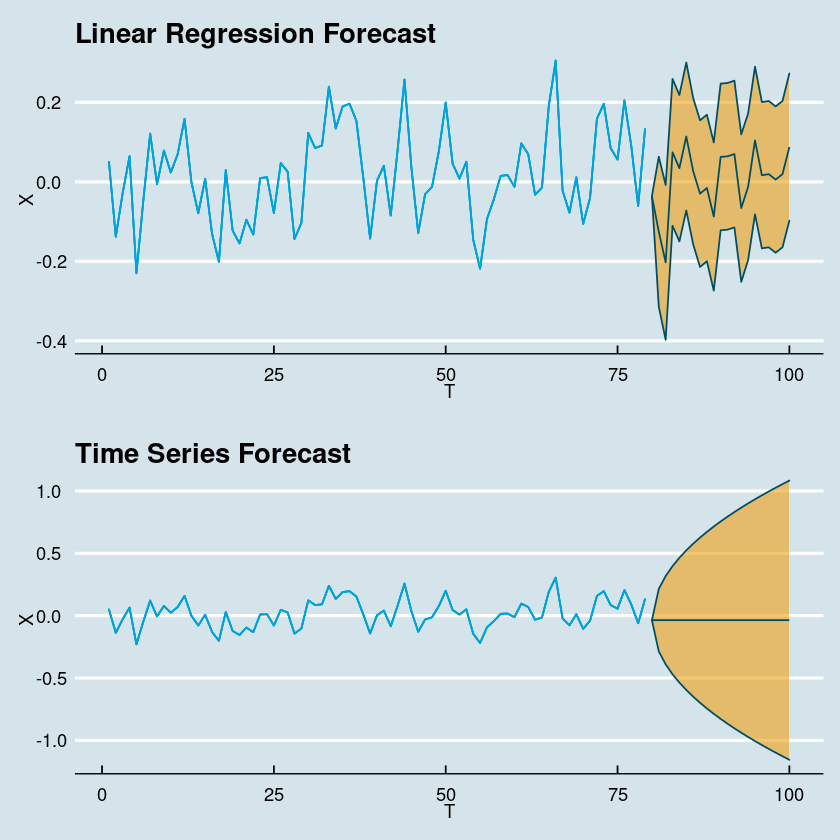

In [2]:
#run function to compare linea
compare.models(n=100)

## Key Concepts: Autocorrelation/Autocovariance

Autocorrelation/autocovariance refers to the correlation/covariance between two observations in the time series at different points.

The central idea behind it is how related the data/time series is over time.

For ease of interpretation we typically focus on autocorrelation i.e. what is the correlation between  $X_t$  and  $X_{t+p}$  for some integer  $p$.

A related concept is partial autocorrelation that computes the correlation adjusting for previous lags/periods i.e. the autocorrelation between  $X_{t}$  and  $X_{t+p}$  adjusting for the correlation of  $X_{t}$  and  $X_{t+1},\ldots, X_{t+p-1}$.

When analyzing time series we usually view autocorrelation/partial autocorrelation in ACF/PACF plots.

Let's view this for the random walk model we analyzed above:  $X_{t}=X_{t-1}+\epsilon_t$.

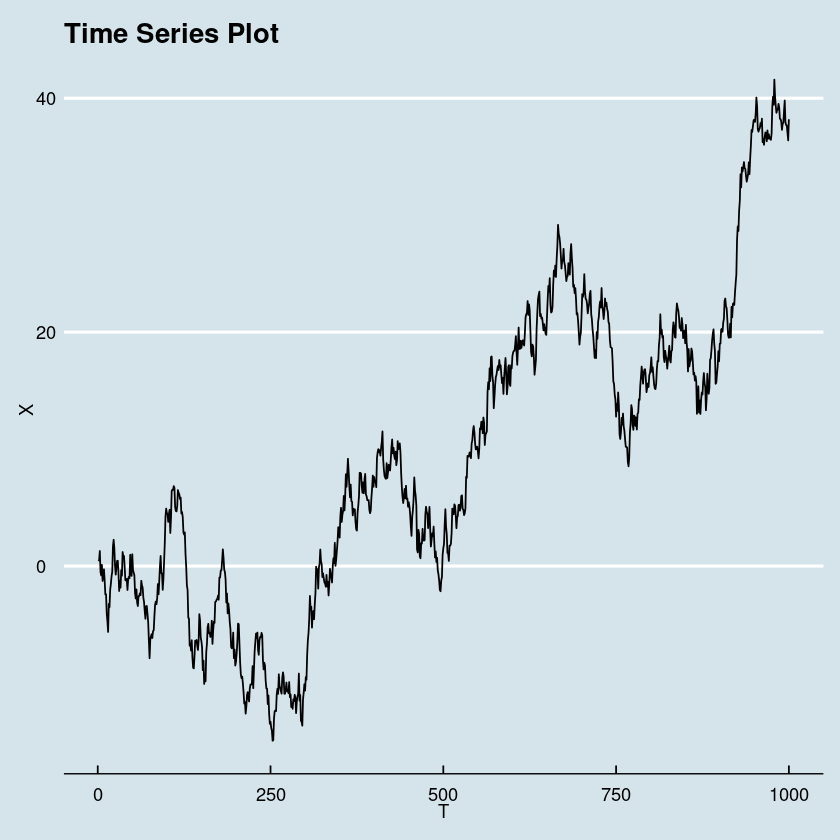

In [3]:
#simulate random walk
dat<-sim.random.walk()

#plot random walk
dat %>% ggplot(aes(t,X)) + geom_line() + xlab("T") + ylab("X") + ggtitle("Time Series Plot")

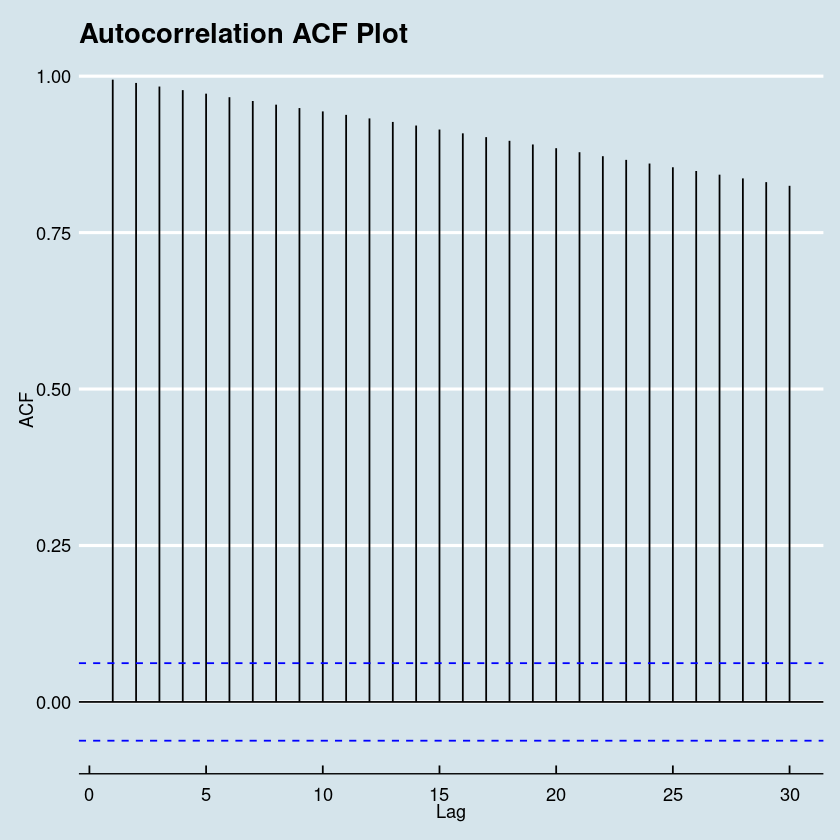

In [4]:
#ACF plot
ggAcf(dat$X,type="correlation") + ggtitle("Autocorrelation ACF Plot")

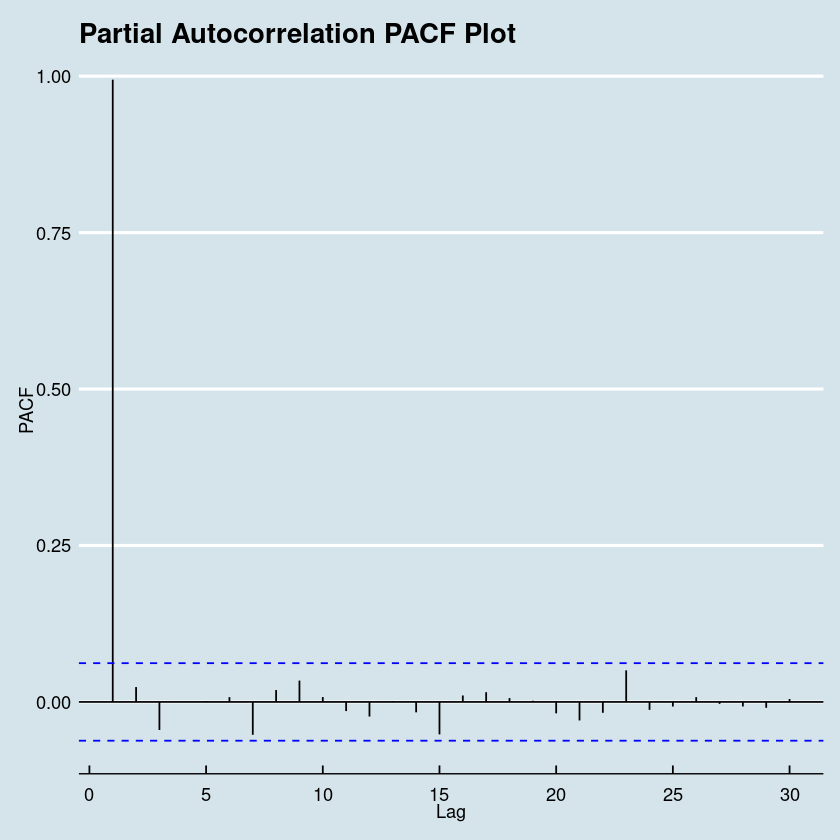

In [5]:
#PACF plot
ggAcf(dat$X,type="partial") + ggtitle("Partial Autocorrelation PACF Plot")

## Key Concepts: Stationarity

The second key concept in time series is stationarity.

While the concept can get quite technical, the basic idea is examining whether the distribution of the data over time is consistent.

There are two main forms of stationarity.

(1) Strict stationarity imples:

The cumulative distribution function of the data does not depend on time:

$F_X(X_1,...,X_T)=F_X(X_{1+\Delta},...,X_{T+\Delta})$ $\forall \Delta\in\mathbb{R}$ 

(2) Weak stationarity implies:

- the mean of the time series is constant

$E(X_t)=E(X_{t+\Delta})$

- the autocovariance/autocorrelation only depends on the time difference between points

$ACF(X_{t},X_{t+\Delta-1})=ACF(X_1,X_{\Delta})$

- the time series has a finite variance

$Var(X_\Delta)<\infty$  $\forall \Delta\in\mathbb{R}$


## Checking for Stationarity

In [6]:
#create three time series for example
df<-sim.stationary.example(n=1000)
head(df);dim(df)

,t,X1,X2,X3
,<int>,<dbl>,<dbl>,<dbl>
1,1,1.73283971,0.5347887,-0.4139451
2,2,0.08952754,1.4962114,1.9640336
3,3,0.69137669,2.1185936,-1.9641230
4,4,0.92749961,3.7770399,-1.7266085
5,5,2.49593610,3.8912154,2.2274573
6,6,2.81215421,6.6018777,0.1017993


[1] 1000    4

- Check a plot of the time series over time and look for constant mean and finite variance i.e. values appear bounded.

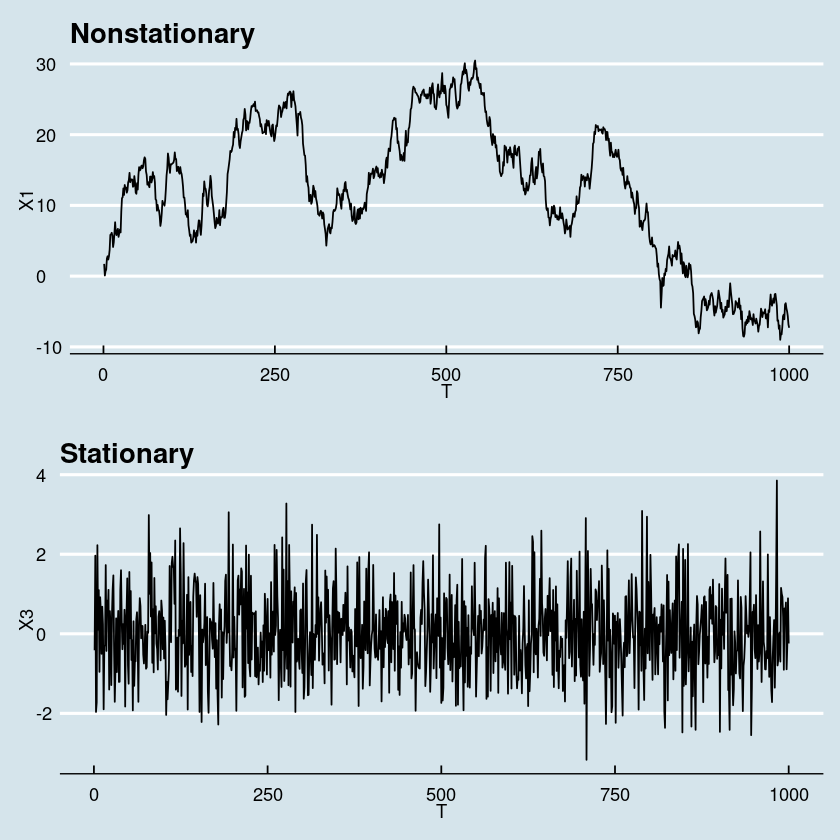

In [7]:
#plot nonstationary and stationary time series
g1<-ggplot(df,aes(x=t,y=X1)) + geom_line() + xlab("T") + ylab("X1") + ggtitle("Nonstationary")
g2<-ggplot(df,aes(x=t,y=X3)) + geom_line() + xlab("T") + ylab("X3") + ggtitle("Stationary")
grid.arrange(g1,g2)

- Look at the ACF plot and see if it dies off quickly as opposed to a gradual decline.

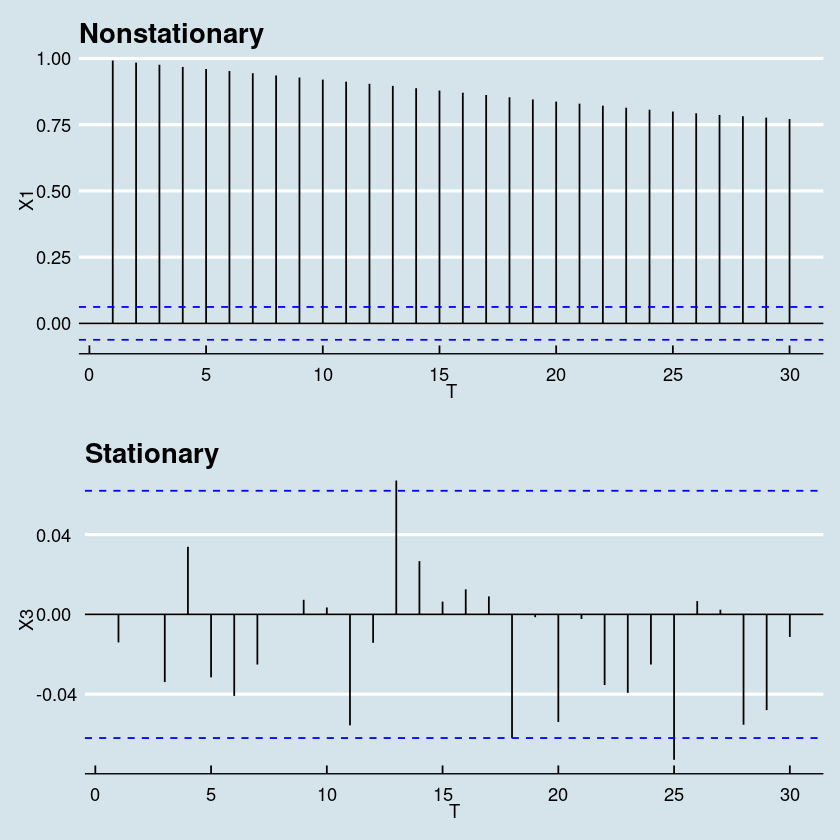

In [8]:
#ACF for nonstationary and stationary time series
g1<-ggAcf(df$X1,type="correlation") + xlab("T") + ylab("X1") + ggtitle("Nonstationary")
g2<-ggAcf(df$X3,type="correlation") + xlab("T") + ylab("X3") + ggtitle("Stationary")
grid.arrange(g1,g2)

- Perform unit root tests such as the Augmented Dickey-Fuller test.

In [9]:
#perform unit test; nonstationary example has large, non-significant p-value
adf.test(df$X1)


	Augmented Dickey-Fuller Test

data:  df$X1
Dickey-Fuller = -2.1603, Lag order = 9, p-value = 0.5105
alternative hypothesis: stationary


In [10]:
#perform unit test; stationary example has small, significant p-value
adf.test(df$X3)

Warning message in adf.test(df$X3):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  df$X3
Dickey-Fuller = -10.432, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary


## Transforming for Stationarity

### Differencing

Differencing involves taking differences between successive time series values.

The order of differencing is defined as p for $X_t-X_{t-p}$.

Let's transform a nonstationary time series to stationary by differencing with the random walk model.

In a random walk $X_t=X_{t-1}+\epsilon_t$ where $\epsilon_t\sim N(0,\sigma^2)$ iid.

Differencing with an order of one means that $\tilde{X}_t=X_t-X_{t-1}=\epsilon_t$.

In [11]:
#difference time series to make stationary
 diff<-df$X1-lag(df$X1,1)

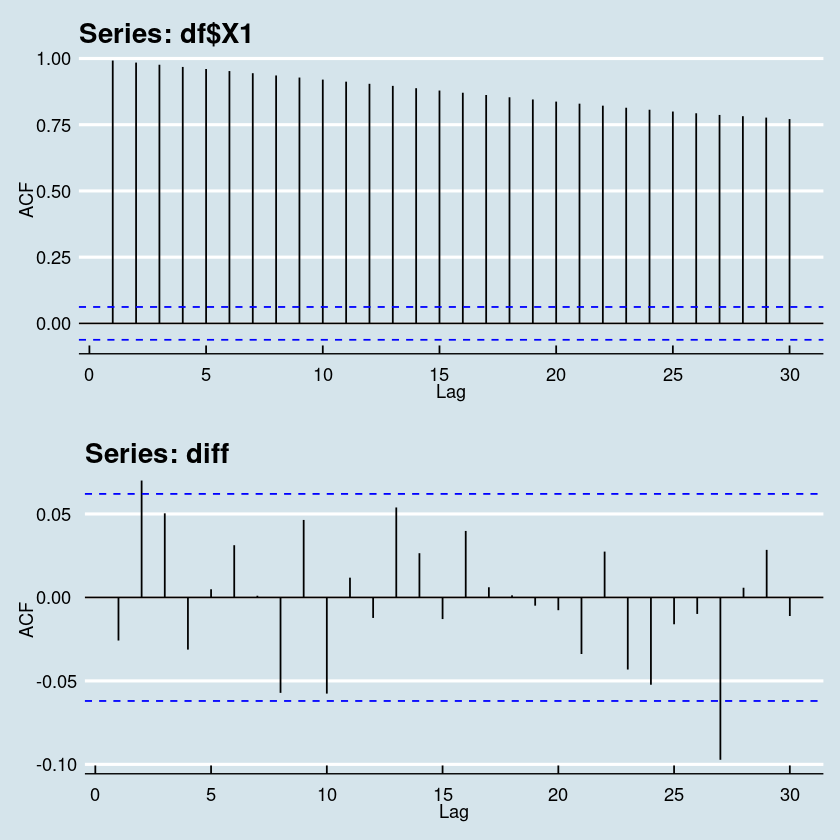

In [12]:
#plot original and differenced time series
g1<-ggAcf(df$X1,type="correlation")
g2<-ggAcf(diff,type="correlation")
grid.arrange(g1,g2)

### Detrending

Detrending involves removing a deterministic relationship with time.

As an example suppose we have the following data generating process $X_t=B_t+\epsilon_t$ where $\epsilon_t\sim N(0,\sigma^2)$ iid.

Detrending involves using the transformed time series $\tilde{X}_t=X_t-Bt=\epsilon_t$.

In [13]:
#detrend time series to make stationary 
detrended<-resid(lm(X2~t,data=df))

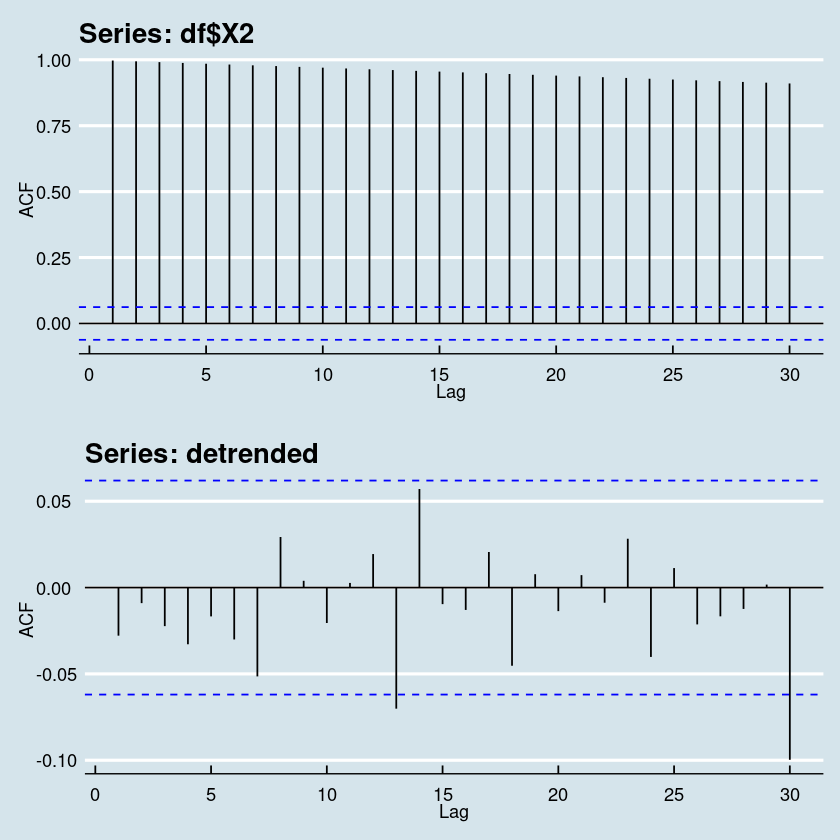

In [14]:
#plot original and detrended time series
g1<-ggAcf(df$X2,type="correlation")
g2<-ggAcf(detrended,type="correlation")
grid.arrange(g1,g2)

## Basic Model Types: AR(p), MA(q), ARMA(p,q), ARIMA(p,d,q), Decomposition

### Autoregressive AR(p) Models
AR models specify $X_t$ as a function of lagged time series values $X_{t-1}$, $X_{t-2}$, ...

i.e $X_t=\mu+\phi_1 X_{t-1}+...+\phi_p X_{t-p}+\epsilon_t$

where $\mu$ is a mean term and $\epsilon_t\overset{iid}\sim N(0,\sigma^2)$ is a random error.

When fitting an AR model the key choice is p, the number of lags to include.

### Moving Average MA(q) Models

MA models specify $X_t$ using random noise lags:

$X_t=\mu+\epsilon_t+\Theta_1\epsilon_{t-1}+...+\Theta_q\epsilon_{t-q}$

where $\mu$ is a mean term and $\epsilon_t\overset{iid}\sim N(0,\sigma^2)$ is a random error.

Similar to an AR model, when fitting an MA model the key choice is q, the number of random shock lags.

### Autoregressive Moving Average ARMA(p,q) Models

ARMA(p,q) models are a combination of an AR and MA model:

$X_t=\mu+\phi_1 X_{t-1}+...+\phi_p X_{t-p}+\epsilon_t+\Theta_1\epsilon_{t-1}+...+\Theta_q\epsilon_{t-q}$

where $\mu$ is a mean term and $\epsilon_t\overset{iid}\sim N(0,\sigma^2)$ is a random error.

When fitting an ARMA model, we need to choose two things: p, the number of AR lags, and q, the number of MA lags.

### Autoregressive Integrated Moving Average ARIMA(p,d,q) Models

ARIMA(p,d,q) is an ARMA model with differencing.

When fitting an ARIMA model we need to choose three things: p, the number of AR lags, q, the number of MA lags, and d, the number of differences to use.

### Decomposition Models

Decomposition models specify $X_t$ as a combination of a trend component ($T_t$), seasonal component ($S_t$), and an error component/residual ($E_t$) i.e. $X_t=f(T_t,S_t,E_t)$.

Common decomposition forms are: $X_t=T_t+S_t+E_t$ or $X_t=T_t*S_t*E_t$ (where then take logs to recover the additive form).

There are various ways to estimate the different trend components: exponential smoothing, state space models/Kalman filtering, STL models, etc.

In this project we will cover STL models because of their ease of use and flexibility.

## Fitting AR/MA/ARMA/ARIMA models with the Box Jenkins Method
We will now go over how to fit AR/MA/ARMA/ARIMA models on a real data set and review a generic strategy for fitting them known as the Box Jenkins method.

This process involves several steps to help identify the p, d, and q parameters that we need:

- Identify whether the time series is stationary or not

- Identify p, d, and q of the time series by

  - Making the the time series stationary through differencing/detrending to find d

  - Looking at ACF/PACF to find p and q

  - Using model fit diagnostics like AIC or BIC to select the best model to find p, d, and q

- Check the model fit using the Ljung-Box test

In [15]:
#load data
ur<-read.csv("MassMonthlyUnemploymentRate.csv")
head(ur);dim(ur)

,DATE,MAURN
,<fct>,<dbl>
1,1976-01-01,11.6
2,1976-02-01,11.3
3,1976-03-01,10.9
4,1976-04-01,9.9
5,1976-05-01,9.4
6,1976-06-01,9.8


[1] 529   2

In [16]:
#check date class
class(ur$DATE)

[1] "factor"

In [17]:
#change date class to date type
ur$DATE<-as.Date(ur$DATE)
class(ur$DATE)

[1] "Date"

### Checking for Stationarity

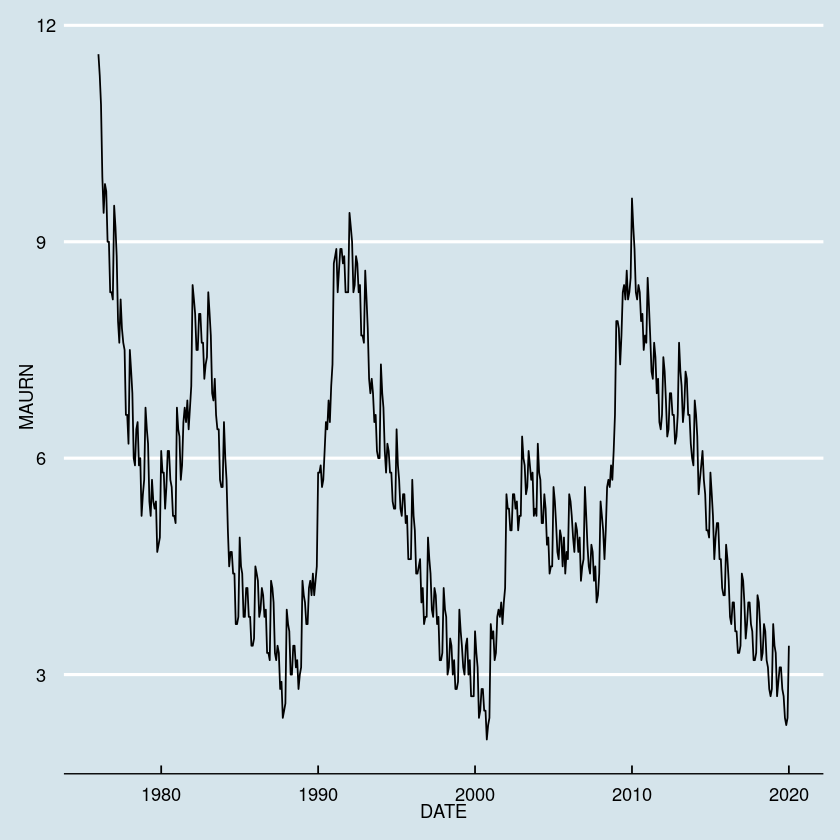

In [18]:
#check time series plot
ggplot(ur, aes(x=DATE,y=MAURN))+geom_line()

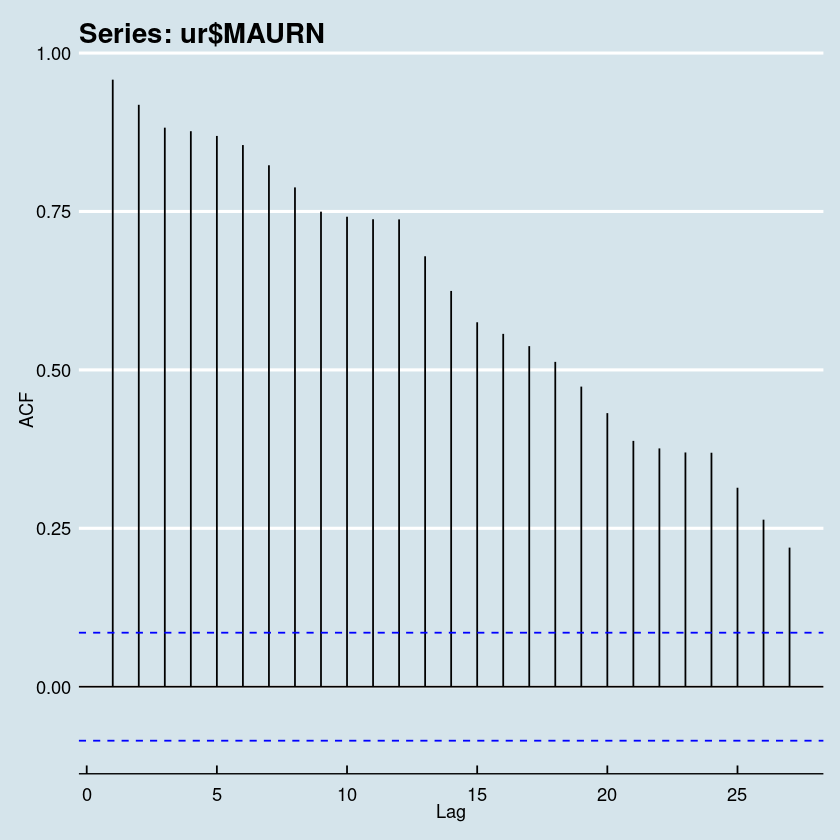

In [19]:
#check ACF plot
ggAcf(ur$MAURN, type="correlation")

In [20]:
#run ADF test
adf.test(ur$MAURN)


	Augmented Dickey-Fuller Test

data:  ur$MAURN
Dickey-Fuller = -3.0954, Lag order = 8, p-value = 0.1146
alternative hypothesis: stationary


### Transforming for Stationarity & Identifying Model Parameters

In [21]:
#fit AR model
ar.model<-auto.arima(ur$MAURN,max.d=0,max.q=0,allowdrift = T)
ar.model

#fit MA model
ma.model<-auto.arima(ur$MAURN,max.d=0,max.p=0,allowdrift = T)
ma.model

#fit ARMA model
arma.model<-auto.arima(ur$MAURN,max.d=0,allowdrift = T)
arma.model

#fit ARIMA model
arima.model<-auto.arima(ur$MAURN,allowdrift = T)
arima.model

Series: ur$MAURN 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
         ar1    mean
      0.9787  5.7425
s.e.  0.0101  0.8498

sigma^2 estimated as 0.2:  log likelihood=-325.44
AIC=656.88   AICc=656.93   BIC=669.7

Series: ur$MAURN 
ARIMA(0,0,5) with non-zero mean 

Coefficients:
         ma1     ma2     ma3     ma4     ma5    mean
      1.3646  1.7103  1.4882  1.2714  0.4804  5.4588
s.e.  0.0368  0.0492  0.0578  0.0393  0.0350  0.1507

sigma^2 estimated as 0.229:  log likelihood=-361.03
AIC=736.05   AICc=736.27   BIC=765.95

Series: ur$MAURN 
ARIMA(3,0,2) with non-zero mean 

Coefficients:
          ar1     ar2     ar3     ma1     ma2    mean
      -0.2267  0.5998  0.5573  1.3361  0.8876  5.7038
s.e.   0.0885  0.0544  0.0569  0.0544  0.0221  0.7764

sigma^2 estimated as 0.1693:  log likelihood=-280.15
AIC=574.3   AICc=574.51   BIC=604.19

Series: ur$MAURN 
ARIMA(4,1,2) 

Coefficients:
         ar1      ar2      ar3     ar4      ma1     ma2
      1.0029  -0.1834  -0.3982  0.4872  -1.1149  0.2512
s.e.  0.0708   0.0750   0.0560  0.0394   0.0793  0.0711

sigma^2 estimated as 0.1509:  log likelihood=-247.45
AIC=508.9   AICc=509.12   BIC=538.78

### Checking the Residuals of the Model Fit

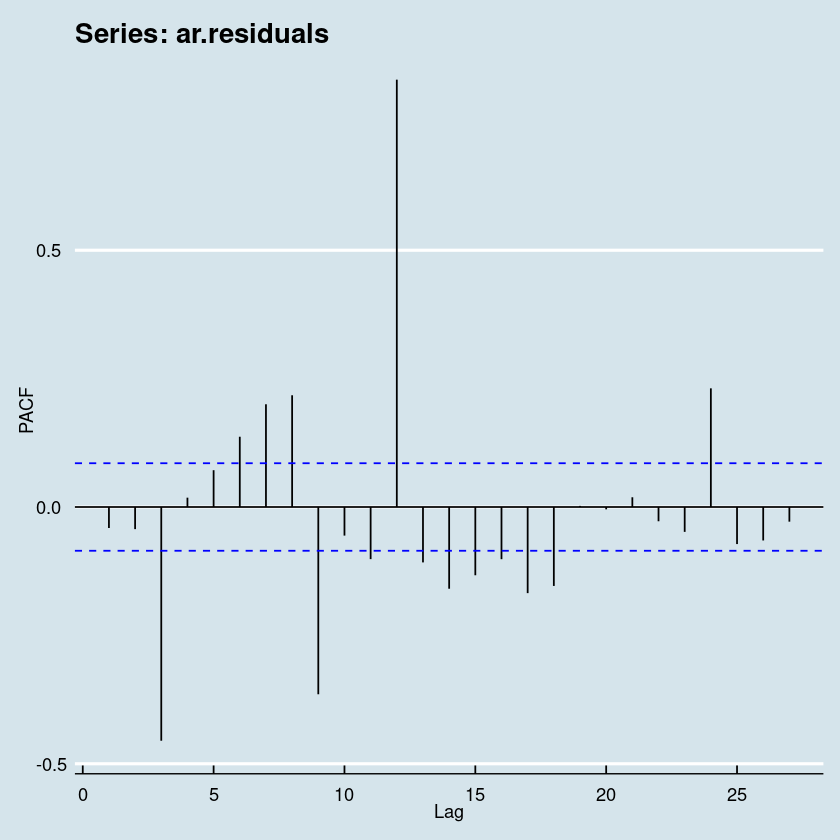

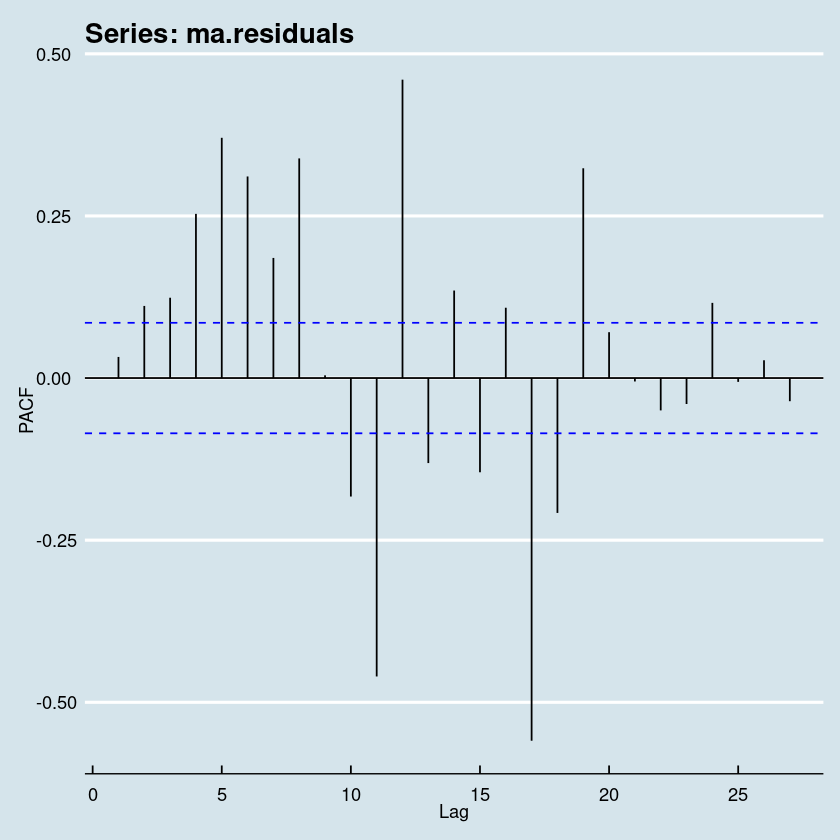

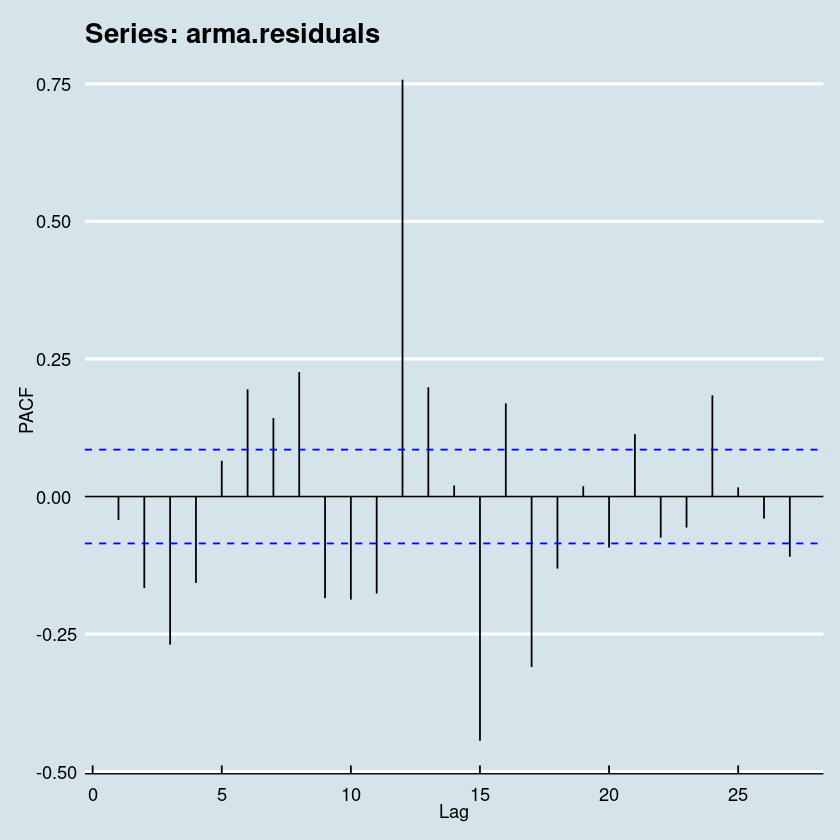


	Box-Ljung test

data:  ar.residuals
X-squared = 0.88802, df = 1, p-value = 0.346



	Box-Ljung test

data:  ma.residuals
X-squared = 0.56386, df = 1, p-value = 0.4527



	Box-Ljung test

data:  arma.residuals
X-squared = 0.96749, df = 1, p-value = 0.3253



	Box-Ljung test

data:  arima.residuals
X-squared = 0.0032696, df = 1, p-value = 0.9544


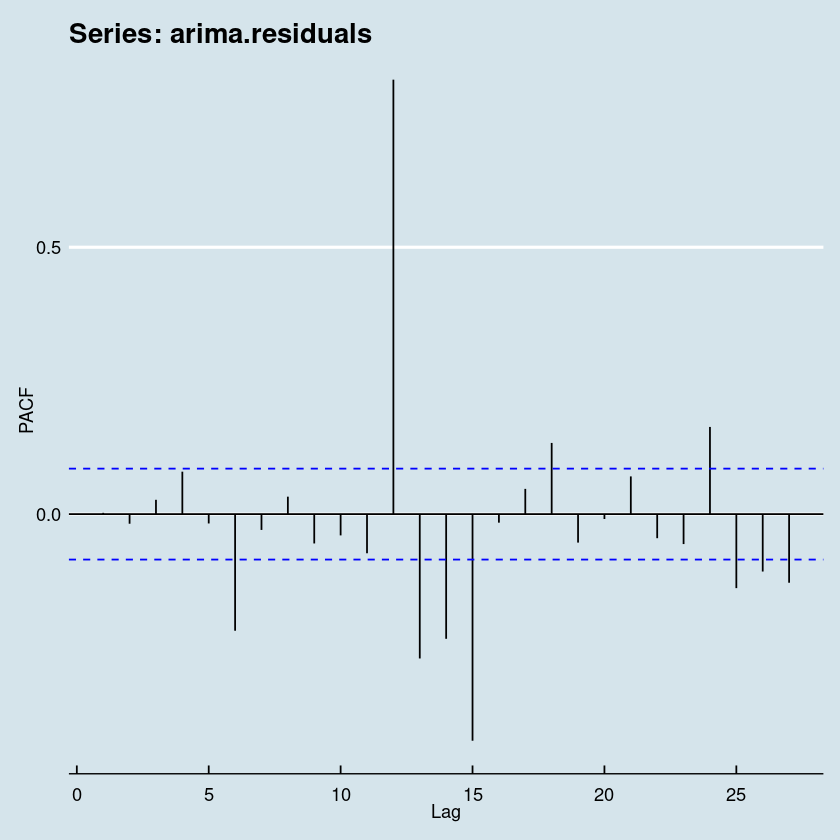

In [22]:
#calculate residuals of each model
ar.residuals<-resid(ar.model)
ma.residuals<-resid(ma.model)
arma.residuals<-resid(arma.model)
arima.residuals<-resid(arima.model)

#plot PACF plot of each models residuals
ggAcf(ar.residuals,type="partial")
ggAcf(ma.residuals,type="partial")
ggAcf(arma.residuals,type="partial")
ggAcf(arima.residuals,type="partial")

#run the Ljung Box test on the residuals
Box.test(ar.residuals,type="Ljung-Box",lag=1)
Box.test(ma.residuals,type="Ljung-Box",lag=1)
Box.test(arma.residuals,type="Ljung-Box",lag=1)
Box.test(arima.residuals,type="Ljung-Box",lag=1)

### Making a forecast for each model

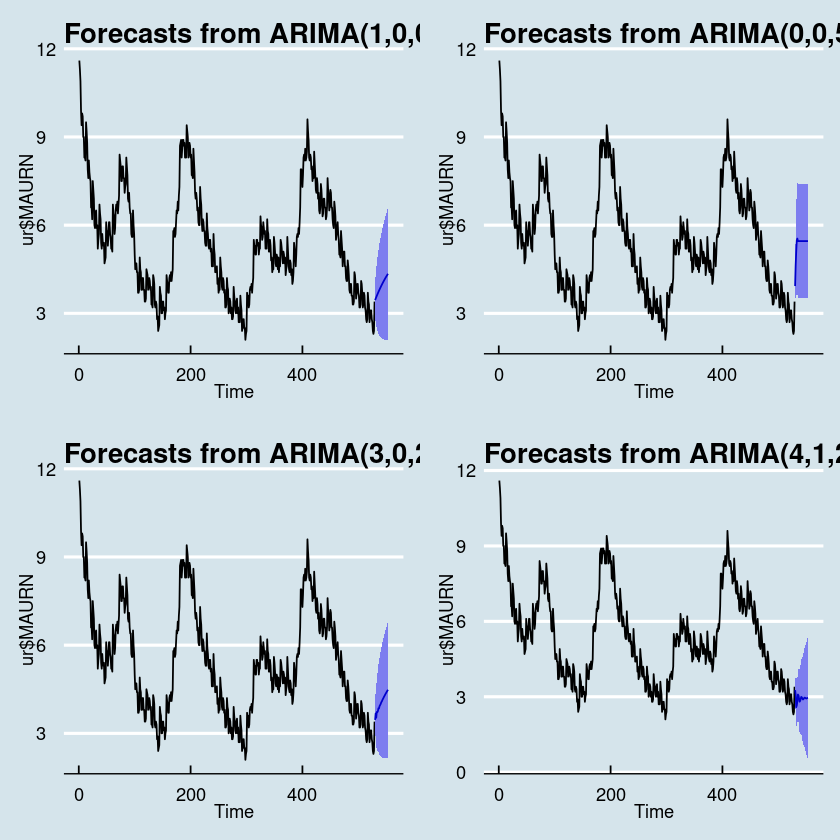

In [23]:
#make forecast for each model
ar.forecast<-forecast(ar.model,h=24,level=80)
ma.forecast<-forecast(ma.model,h=24,level=80)
arma.forecast<-forecast(arma.model,h=24,level=80)
arima.forecast<-forecast(arima.model,h=24,level=80)

#plot forecast for each model
g1<-autoplot(ar.forecast)
g2<-autoplot(ma.forecast)
g3<-autoplot(arma.forecast)
g4<-autoplot(arima.forecast)
grid.arrange(g1,g2,g3,g4,nrow=2,ncol=2)

## Fitting Seasonal Trend Loess (STL) Decomposition Models

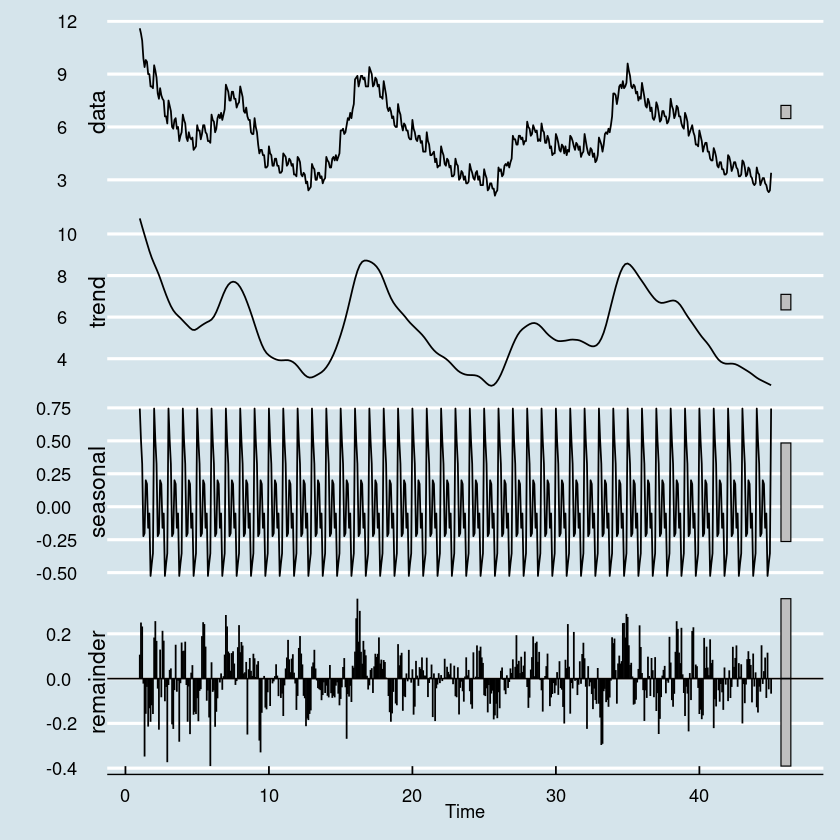

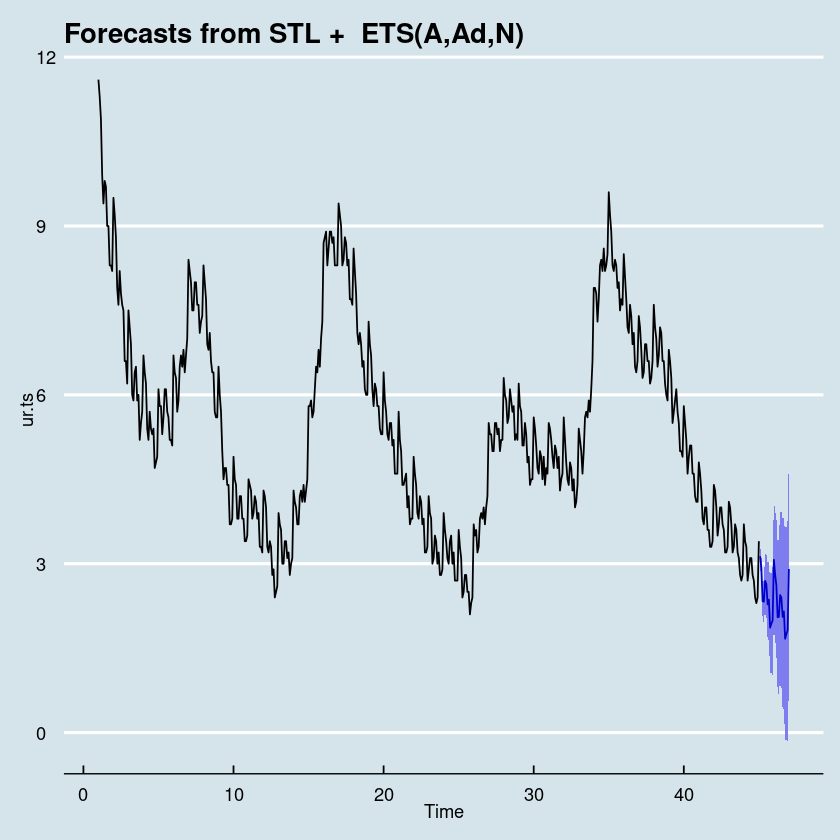

In [24]:
#transform to time series object; need to specify frequency
ur.ts<-ts(ur$MAURN,frequency = 12)

#fit stil model
stl.model<-stl(ur.ts,s.window="periodic")

#plot model fit
autoplot(stl.model)

#make forecast
stl.forecast<-forecast(stl.model,h=24,level=80)
autoplot(stl.forecast)


## Where to go Next
- Advanced time series models
  - ARCH, GARCH, etc. that model changing variance over time
- Vector Autoregression (VAR)
  - For multivariate i.e. multiple time series and modeling dependencies between them
- Machine Learning
  - How to do CV with time series
  - Neural networks for sequence data (LSTMs, etc.)
- Spatial Statistics
  - Generalize time dependence to spatial dependence in multiple dimensions
- Econometrics
  - Cointegration
  - Granger Causality
  - Serial correlation
  - Regression with time series data
- Bayesian time series